# Python Notebook for MLT TA Activity

##**Importing the python Libraries**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

##***Reads a CSV file named***

In [ ]:
data = pd.read_csv('/content/iro_dataset.csv')  # Load the CSV file


##***Identifies columns containing non-numeric (object type) data in the dataset.***



In [ ]:
data = pd.get_dummies(data, columns=['semester', 'department'])


##***Applies label encoding to convert non-numeric columns to numeric representation using the LabelEncoder.***

In [ ]:
# Encode all non-numeric columns
non_numeric_cols = [col for col in data.columns if data[col].dtype == 'object']

for col in non_numeric_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

##***Identifies and one-hot encodes categorical columns that were not encoded using label encoding.***

In [ ]:
# One-hot encode categorical columns
categorical_cols = [col for col in data.columns if col not in non_numeric_cols + ['reg_no', 'attended']]
data = pd.get_dummies(data, columns=categorical_cols)

##***Separates the dataset into feature variables (X) and the target variable (y).***



##***Separate features and target variable***

In [ ]:

X = data.drop(['reg_no', 'attended'], axis=1)
y = data['attended']

##***One-hot encode***

In [ ]:
# One-hot encode categorical columns
categorical_cols = ['semester', 'department']
preprocessor = ColumnTransformer(
    transformers=[('encoder', OneHotEncoder(), categorical_cols)],
    remainder='passthrough'
)

##***Splits the data into training and testing sets, with 80% for training***

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 2: Model Creation - Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)  # Initialize the Logistic Regression model
logistic_model.fit(X_train, y_train)  # Train the Logistic Regression model


LogisticRegression(max_iter=1000)

In [ ]:
# Step 3: Model Evaluation - Logistic Regression
logistic_y_pred = logistic_model.predict(X_test)  # Make predictions using Logistic Regression


##***Accuracy and F1-score for Logistic Regression***

In [ ]:
# Calculate accuracy and F1-score for Logistic Regression
logistic_accuracy = accuracy_score(y_test, logistic_y_pred)
logistic_f1 = f1_score(y_test, logistic_y_pred)

In [ ]:
print("Logistic Regression:")
print(f"Accuracy: {logistic_accuracy}")
print(f"F1 Score: {logistic_f1}")


Logistic Regression:
Accuracy: 0.6470588235294118
F1 Score: 0.25


##***Confusion Matrix***

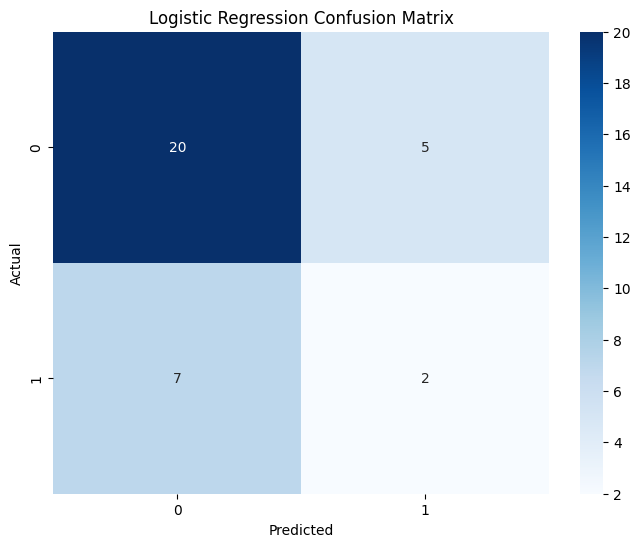

In [ ]:
# Create a confusion matrix (heatmap) for Logistic Regression
logistic_conf_matrix = confusion_matrix(y_test, logistic_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(logistic_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

##***Decision Tree Classifier***

In [ ]:
# Step 2: Model Creation - Decision Tree Classifier
decision_tree_model = DecisionTreeClassifier()  # Initialize the Decision Tree Classifier
decision_tree_model.fit(X_train, y_train)  # Train the Decision Tree Classifier model


DecisionTreeClassifier()

In [ ]:
# Step 3: Model Evaluation - Decision Tree Classifier
dt_y_pred = decision_tree_model.predict(X_test)  # Make predictions using Decision Tree Classifier


In [ ]:
# Calculate accuracy and F1-score for Decision Tree Classifier
dt_accuracy = accuracy_score(y_test, dt_y_pred)
dt_f1 = f1_score(y_test, dt_y_pred)

In [ ]:
print("\nDecision Tree Classifier:")
print(f"Accuracy: {dt_accuracy}")
print(f"F1 Score: {dt_f1}")


Decision Tree Classifier:
Accuracy: 0.6764705882352942
F1 Score: 0.26666666666666666


##***Heatmap for Decision Tree Classifier***

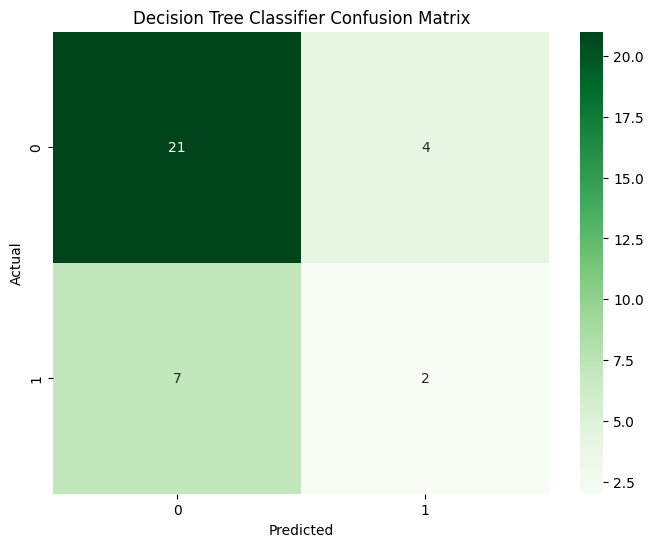

In [ ]:
# Create a confusion matrix (heatmap) for Decision Tree Classifier
dt_conf_matrix = confusion_matrix(y_test, dt_y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Decision Tree Classifier Confusion Matrix')
plt.show()

##***Performance Graph***

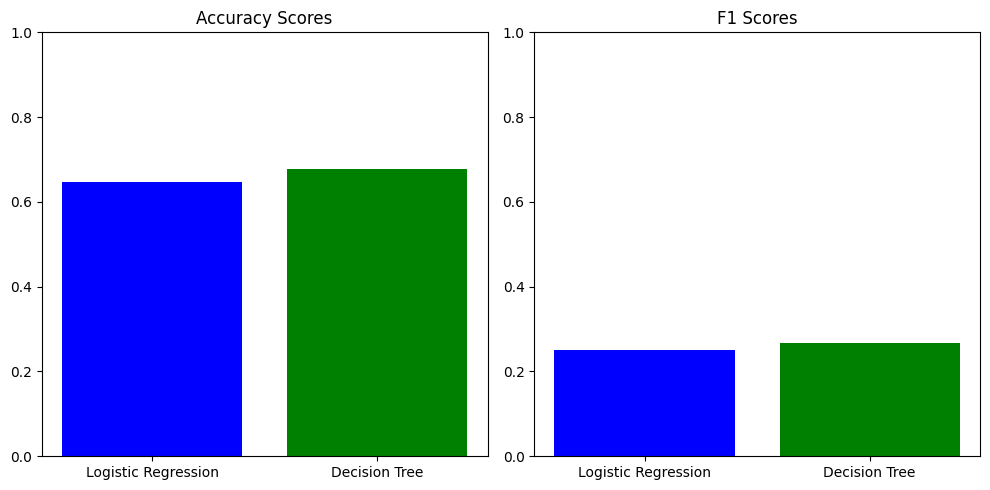

In [ ]:
# Performance Graph
models = ['Logistic Regression', 'Decision Tree']
accuracy_scores = [logistic_accuracy, dt_accuracy]
f1_scores = [logistic_f1, dt_f1]

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.bar(models, accuracy_scores, color=['blue', 'green'])
plt.title('Accuracy Scores')
plt.ylim(0, 1)

plt.subplot(1, 2, 2)
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.title('F1 Scores')
plt.ylim(0, 1)

plt.tight_layout()
plt.show()



##***Correlation Graph***

<ipython-input-31-b0214ce52d02>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


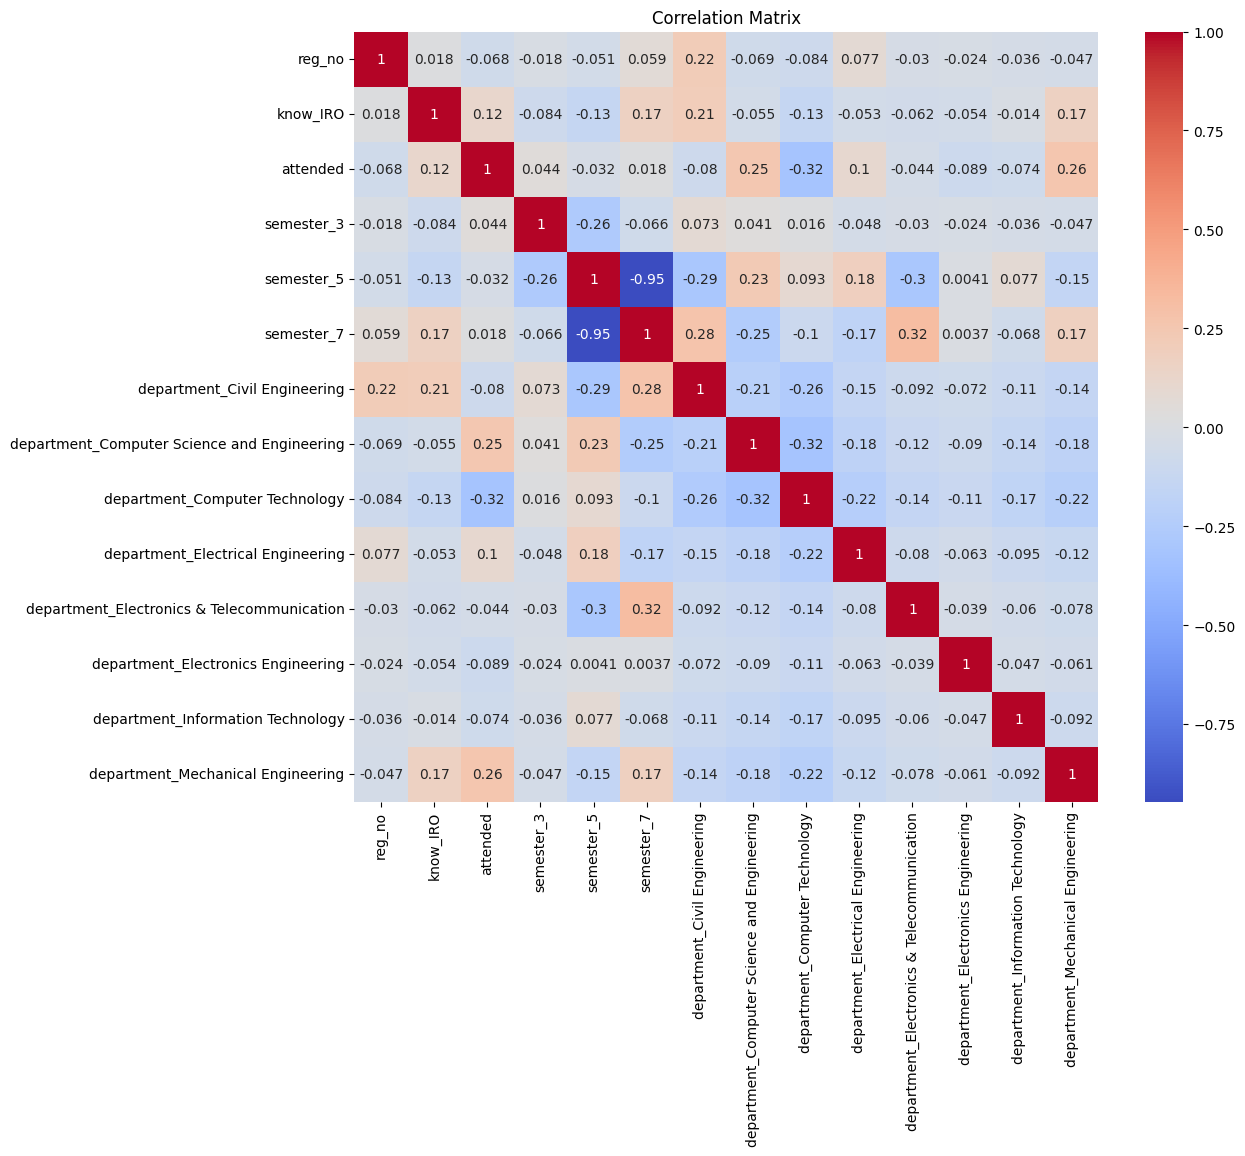

In [ ]:
# Correlation Graph
plt.figure(figsize=(12, 10))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()